<a href="https://colab.research.google.com/github/komorimasashi/bunka-hakaru/blob/main/R_dominant_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##  k-means Dominant Color     ##
##   2011.11.18     ##
##  Masashi Komori  ##

In [ ]:

# k-means法を行う関数
K.means <- function(x, k, maxloop=10)
{

	#最も近くにある重心を探す関数
	pos <- function(dist)
	{
		min.dist <- min(dist)
		for (i in 1:k) {
			if (dist[i] == min.dist) {
			return(i)
			}
 		}
	}

	n <- nrow(x)
	p <- ncol(x)
	dist <- 1:k
	group <- 1:n
	groupcol <- matrix(0, nrow=n, ncol=3)
	centroid <- matrix(1:(k*p), nrow=k)

	#一様分布乱数を使い適当に重心を決めてみる
	for (i in 1:k) {
		centroid[i,] <- x[ceiling(runif(1)*n),]
	}

	w <- x
	
	torgb <- rbind(c(3.240479,-1.53715,-.498535), c(-0.969256,1.875991,.041556), c(0.055648,-0.204043,1.057311))
	rgb <- torgb[,1:2]%*% t(x)	
	#作図
	par(mfrow=c(3,2)) 
	plot(x, pch =20, main="初期状態", col=rgb((rgb[1,]-min(rgb[1,]))/(max(rgb[1,])-min(rgb[1,])),(rgb[2,]-min(rgb[2,]))/(max(rgb[2,])-min(rgb[2,])),(rgb[3,]-min(rgb[3,]))/(max(rgb[3,])-min(rgb[3,]))), xlim=c(min(x[,1]),max(x[,1])),ylim=c(min(x[,2]),max(x[,2])))
	
	par(new=T)	
	plot(centroid, col=1, pch =3, xlim=c(min(x[,1]),max(x[,1])),ylim=c(min(x[,2]),max(x[,2])),ann = F)


 
	#解が収束するまで繰り返す処理
	for (loop in 1:maxloop) {
		centroid0 <- centroid
	
		#各サンプルの最も近くにある重心を探す
		for (i in 1:n) {
			for (j in 1:k) {
				dist[j] <- sum((x[i,]-centroid[j,])^2)
			}
			group[i] <- pos(dist)
			groupcol[i,] <- torgb[,1:2] %*%  centroid[pos(dist),]
		}
		
		#重心を求めなおす
		for (j in 1:k) {
			w <- matrix(x[group == j,], ncol=p)
			centroid[j,] <- apply(w, 2, mean)
		}
		
		#新たに求めた重心がひとつ前のステップと変化が無ければ終了
		if (all(abs((centroid-centroid0)/centroid) < 1e-5)) break

		#作図
		plot(x,
		col=rgb(
		(groupcol[,1]-min(rgb[1,]))/(max(rgb[1,])-min(rgb[1,])),
		(groupcol[,2]-min(rgb[2,]))/(max(rgb[2,])-min(rgb[2,])),
		(groupcol[,3]-min(rgb[3,]))/(max(rgb[3,])-min(rgb[3,]))), 
		xlim=c(min(x[,1]),max(x[,1])), 
		ylim=c(min(x[,2]),max(x[,2])),
		 pch =20, main=loop)
		
		par(new=T)	
		
		plot(centroid, pch =3, xlim=c(min(x[,1]),max(x[,1])),ylim=c(min(x[,2]),max(x[,2])),ann = F)

	}
	#list(centroid=centroid, cluster=cbind(x, group))
	
}

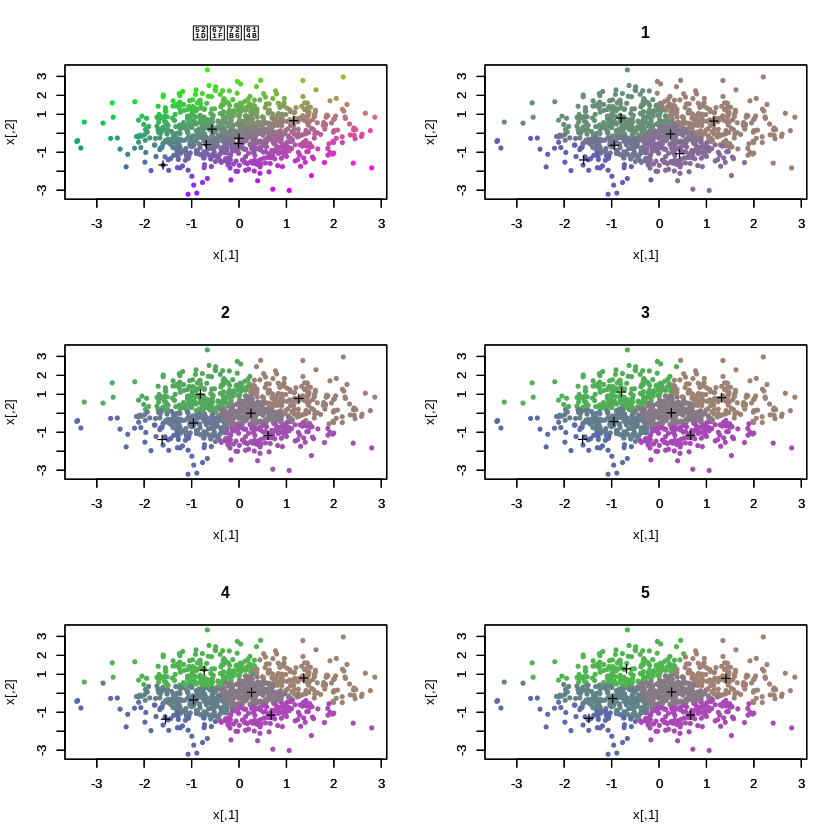

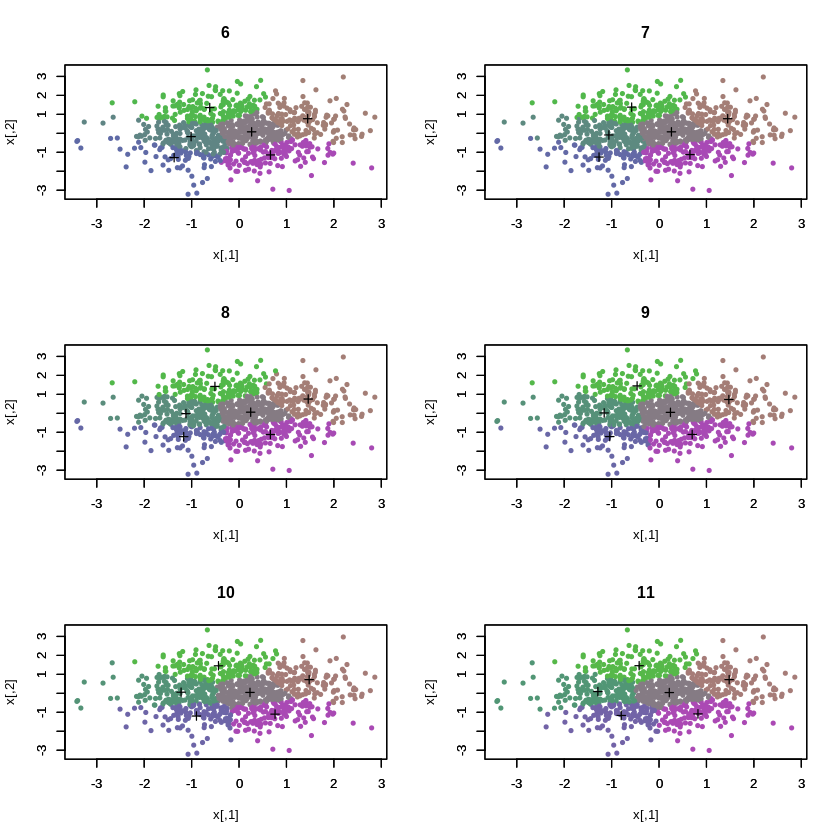

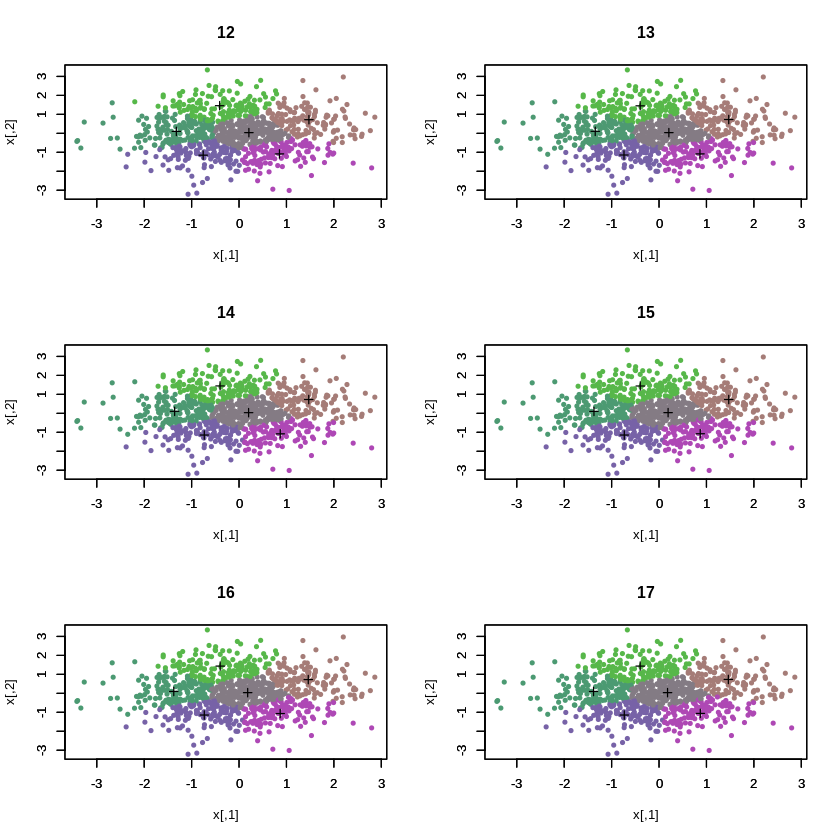

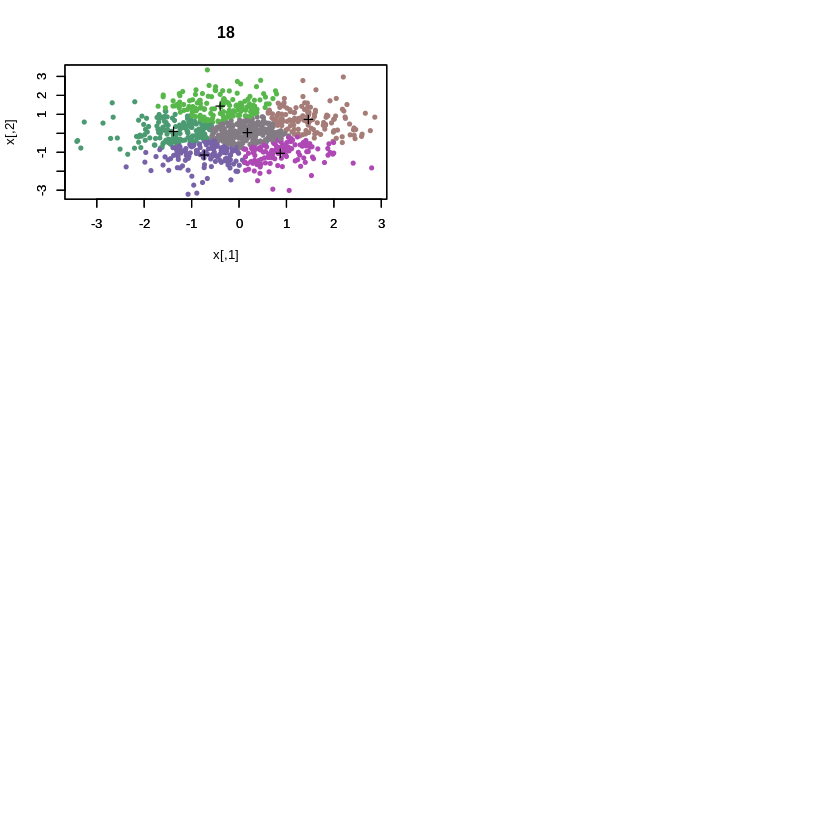

In [ ]:
#サンプル数
n <- 1000
#次元数
p <- 2
#クラスタ数
k <-6
#各サンプルに多次元正規分布する乱数を入れる
x <- matrix(rnorm(n*p), nrow=n)
#K.means関数を実行する
K.means(x, k, maxloop=20)
